In [1]:
# download the traing dataset
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-01-30 12:48:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2021-01-30 12:48:50 (13.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [2]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-01-30 12:48:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-01-30 12:48:51 (94.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
import matplotlib.patches as mpatches


## Load the Data

In [5]:
# load the dataset into a Pandas DataFrame
loan_df_training = pd.read_csv('loan_train.csv')
loan_df_training.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
loan_df_test = pd.read_csv('loan_test.csv')
loan_df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [7]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print(f'The number of rowsin the train set: {loan_df_training.shape[0]}\nThe number of columns in the train set: {loan_df_training.shape[1]}')

The number of rowsin the train set: 346
The number of columns in the train set: 10


In [8]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print(f'The number of rows in the test set: {loan_df_test.shape[0]}\nThe number of columns in the test set: {loan_df_test.shape[1]}')

The number of rows in the test set: 54
The number of columns in the test set: 10


## Investigate the dataset

In [9]:
# Counting the number of null (missing) values in each column
loan_df_training.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [10]:
# Is there are a missing values?
print(f'the nunmbers of missing values in the dataset is: {loan_df_training.isna().sum().sum()}')

the nunmbers of missing values in the dataset is: 0


In [11]:
# knowing the distribution of the numerical values in the dataset
loan_df_training.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [12]:
loan_df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


### Casting the datatypes of some features in Dataframe

##### Data Type of effective_date and due_date will be changed to DateTime.

In [13]:
#  Convert effective_date and due_date from 'object' type to 'datetime64[ns]'
loan_df_training['due_date'] = pd.to_datetime(loan_df_training['due_date']).dt.date.astype('datetime64[ns]')
loan_df_training['effective_date'] = pd.to_datetime(loan_df_training['effective_date']).dt.date.astype('datetime64[ns]')

### One-Hot Encoding for the categorical and ordinal features

In [14]:
loan_df_training['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [15]:
loan_df_training['PAID_OFF'] = pd.get_dummies(loan_df_training['loan_status'], drop_first=True)
loan_df_training.drop(['loan_status'], axis=1, inplace=True)

In [16]:
loan_df_test['PAID_OFF'] = pd.get_dummies(loan_df_test['loan_status'], drop_first=True)
loan_df_test.drop(['loan_status'], axis=1, inplace=True)

In [17]:
male_sex = pd.get_dummies(loan_df_training['Gender'], prefix='Sex', drop_first=True)
loan_df_training = pd.concat([loan_df_training, male_sex], axis=1)
loan_df_training.drop(['Gender'], axis=1, inplace=True)


In [18]:
male_sex = pd.get_dummies(loan_df_test['Gender'], prefix='Sex', drop_first=True)
loan_df_test = pd.concat([loan_df_test, male_sex], axis=1)
loan_df_test.drop(['Gender'], axis=1, inplace=True)


In [19]:
loan_df_training['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [20]:
education_dummies = pd.get_dummies(loan_df_training['education'])
loan_df_training = pd.concat([loan_df_training, education_dummies], axis=1)
loan_df_training.drop(['education'], axis=1, inplace=True)


In [21]:
education_dummies = pd.get_dummies(loan_df_test['education'])
loan_df_test = pd.concat([loan_df_test, education_dummies], axis=1)
loan_df_test.drop(['education'], axis=1, inplace=True)

In [22]:
loan_df_training.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,PAID_OFF,Sex_male,Bechalor,High School or Below,Master or Above,college
0,0,0,1000,30,2016-09-08,2016-10-07,45,1,1,0,1,0,0
1,2,2,1000,30,2016-09-08,2016-10-07,33,1,0,1,0,0,0
2,3,3,1000,15,2016-09-08,2016-09-22,27,1,1,0,0,0,1
3,4,4,1000,30,2016-09-09,2016-10-08,28,1,0,0,0,0,1
4,6,6,1000,30,2016-09-09,2016-10-08,29,1,1,0,0,0,1


In [23]:
loan_df_test.head()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,effective_date,due_date,age,PAID_OFF,Sex_male,Bechalor,High School or Below,Master or Above,college
0,1,1,1000,30,9/8/2016,10/7/2016,50,1,0,1,0,0,0
1,5,5,300,7,9/9/2016,9/15/2016,35,1,1,0,0,1,0
2,21,21,1000,30,9/10/2016,10/9/2016,43,1,0,0,1,0,0
3,24,24,1000,30,9/10/2016,10/9/2016,26,1,1,0,0,0,1
4,35,35,800,15,9/11/2016,9/25/2016,29,1,1,1,0,0,0


In [24]:
loan_df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            346 non-null    int64         
 1   Unnamed: 0.1          346 non-null    int64         
 2   Principal             346 non-null    int64         
 3   terms                 346 non-null    int64         
 4   effective_date        346 non-null    datetime64[ns]
 5   due_date              346 non-null    datetime64[ns]
 6   age                   346 non-null    int64         
 7   PAID_OFF              346 non-null    uint8         
 8   Sex_male              346 non-null    uint8         
 9   Bechalor              346 non-null    uint8         
 10  High School or Below  346 non-null    uint8         
 11  Master or Above       346 non-null    uint8         
 12  college               346 non-null    uint8         
dtypes: datetime64[ns](2)

### the distribution of the age

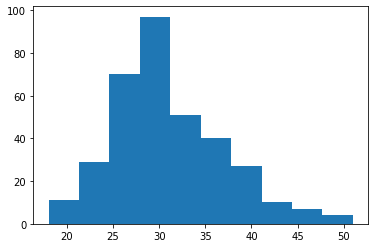

In [25]:
plt.hist(loan_df_training['age']);

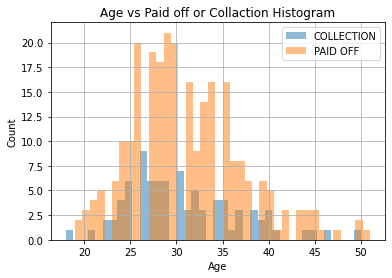

In [27]:
# the Paid off and COLLECTION according to the age
loan_df_training.age[loan_df_training['PAID_OFF'] == 0].hist(label = 'COLLECTION', alpha = 0.5, bins = 40)
loan_df_training.age[loan_df_training['PAID_OFF'] == 1].hist(label = 'PAID OFF', alpha = 0.5, bins =40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs Paid off or Collaction Histogram')
plt.legend();

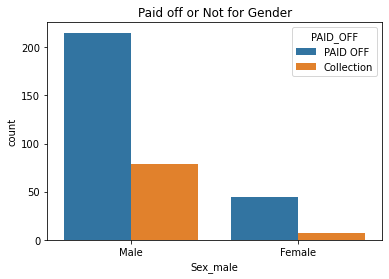

In [29]:
import seaborn as sns

ax = sns.countplot(x=loan_df_training['Sex_male'].map({1:'Male',0:'Female'}), hue=loan_df_training['PAID_OFF'].map({1:'PAID OFF',0:'Collection'}), data=loan_df_training)
ax.set_title("Paid off or Not for Gender")
plt.show()

In [30]:
loan_df_training.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,PAID_OFF,Sex_male,Bechalor,High School or Below,Master or Above,college
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306,0.751445,0.849711,0.127168,0.436416,0.005780,0.430636
std,115.459715,115.459715,109.425530,7.991006,6.039418,0.432801,0.357872,0.333643,0.496659,0.075918,0.495882
min,0.000000,0.000000,300.000000,7.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing 

In [31]:
loan_df_training.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'PAID_OFF', 'Sex_male', 'Bechalor',
       'High School or Below', 'Master or Above', 'college'],
      dtype='object')

In [32]:
loan_df_training.drop(['effective_date', 'due_date'], axis = 1, inplace=True)

In [33]:
loan_df_test.drop(['effective_date', 'due_date'], axis=1, inplace=True)

In [34]:
train_target = loan_df_training['PAID_OFF']

In [35]:
train_features = loan_df_training.drop('PAID_OFF', axis=1)

In [36]:
test_target = loan_df_test['PAID_OFF']

In [37]:
test_features = loan_df_test.drop('PAID_OFF', axis=1)

In [38]:
from sklearn import preprocessing
train_features = preprocessing.StandardScaler().fit(train_features).transform(train_features)

In [39]:
test_features = preprocessing.StandardScaler().fit(test_features).transform(test_features)

In [40]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_features, test_features, train_target, test_target

In [41]:
# Show the results of the train_test split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 346 samples.
Testing set has 54 samples.


## Apply different classification algorithm on the data.

In [45]:
def visualize(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (15,10))

    # Constants
    bar_width = 0.3
    colors = ['#0000AA','#00A0A0','#00AA00', '#AA0000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['Jaccard_index_train', 'f_train', 'acc_train', 'Jaccard_index_test', 'acc_test', 'f_test']):
                
            # Creative plot code
            ax[j//3, j%3].bar(k*bar_width, results[learner][metric], width = bar_width, align='center', color = colors[k])
            ax[j//3, j%3].axes.xaxis.set_visible(False)
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Jaccar index Score")
    ax[0, 1].set_ylabel("F-score")
    ax[0, 2].set_ylabel("Accuracy Score")
    
    ax[1, 0].set_ylabel("Jaccar index Score")
    ax[1, 1].set_ylabel("F-score")
    ax[1, 2].set_ylabel("Accuracy Score")
    
    # Add titles
    ax[0, 0].set_title("Jaccar index Score on Training Set")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    
    ax[1, 0].set_title("Jaccar index Score on Testing Set")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 0].set_ylim((0, 1))
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 0].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    
    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Four Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

I will use the following algorithms to build my models:

*   k-Nearest Neighbour
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:62: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


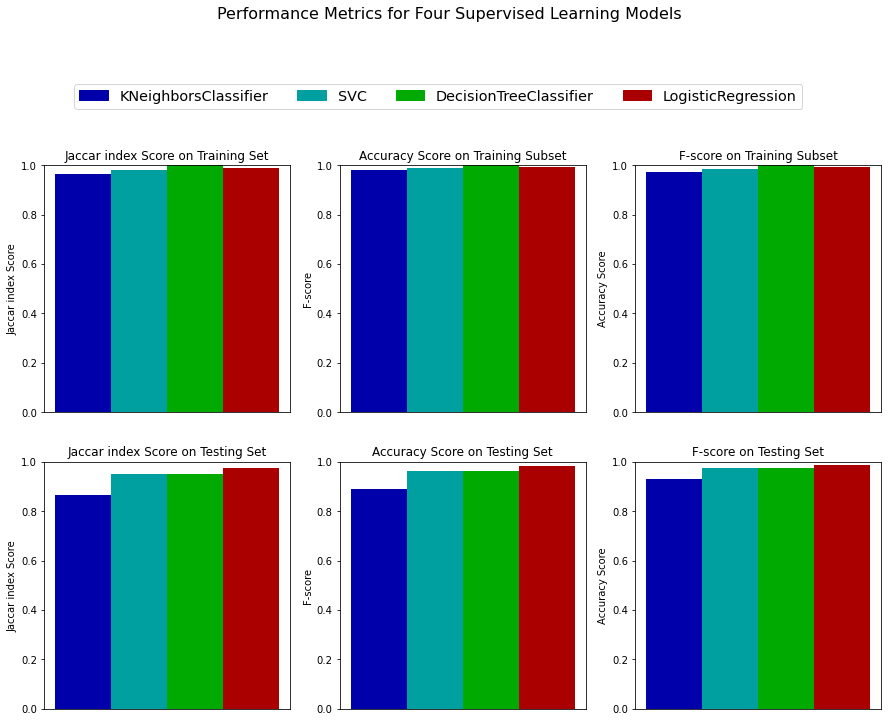

In [46]:
# load the classification algorithms 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Matrices measure
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss, f1_score
from sklearn.metrics import accuracy_score


clf_KNN = KNeighborsClassifier()
clf_SVM = SVC()
clf_tree = DecisionTreeClassifier()
clf_log = LogisticRegression()

results = {}
for clf in [clf_KNN, clf_SVM, clf_tree, clf_log]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    learner = clf.fit(X_train, y_train)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    # Compute Jaccard index on test set using jaccard_similarity_score()
    results[clf_name]['Jaccard_index_train'] = jaccard_score(y_train, predictions_train)
    
        
    # Compute Jaccard index on test set using jaccard_similarity_score()
    results[clf_name]['Jaccard_index_test'] = jaccard_score(y_test ,predictions_test)
    
    # Compute F-score on the the training samples using fbeta_score()
    results[clf_name]['f_train'] = f1_score(y_train, predictions_train)

    # Compute F-score on the test set which is y_test
    results[clf_name]['f_test'] = f1_score(y_test ,predictions_test)
    
    # Compute accuracy on test set using accuracy_score()
    results[clf_name]['acc_test'] = accuracy_score(y_test ,predictions_test)

    # Compute accuracy on training set using accuracy_score()
    results[clf_name]['acc_train'] = accuracy_score(y_train, predictions_train)
    
visualize(results)   

In [44]:
results

{'KNeighborsClassifier': {'Jaccard_index_train': 0.9628252788104089,
  'Jaccard_index_test': 0.8666666666666667,
  'f_train': 0.9810606060606061,
  'f_test': 0.9285714285714285,
  'acc_test': 0.8888888888888888,
  'acc_train': 0.9710982658959537},
 'SVC': {'Jaccard_index_train': 0.9809885931558935,
  'Jaccard_index_test': 0.95,
  'f_train': 0.9904030710172745,
  'f_test': 0.9743589743589743,
  'acc_test': 0.9629629629629629,
  'acc_train': 0.9855491329479769},
 'DecisionTreeClassifier': {'Jaccard_index_train': 1.0,
  'Jaccard_index_test': 0.95,
  'f_train': 1.0,
  'f_test': 0.9743589743589743,
  'acc_test': 0.9629629629629629,
  'acc_train': 1.0},
 'LogisticRegression': {'Jaccard_index_train': 0.9885496183206107,
  'Jaccard_index_test': 0.975,
  'f_train': 0.9942418426103647,
  'f_test': 0.9873417721518987,
  'acc_test': 0.9814814814814815,
  'acc_train': 0.9913294797687862}}

In [49]:
print(f'the Matrices of test set\n')
for k, learner in enumerate(results.keys()):
    print(f'\tthe Jaccard index of {learner} for test set is: {results[learner]["Jaccard_index_test"]}\n')
    print(f'\tthe F_1 score of {learner} for test set is: {results[learner]["f_test"]}\n')
    print(f'\tthe accuracy score of {learner} for test set is: {results[learner]["acc_test"]}\n\n\n')

yhatLOG = clf_log.predict(X_test)
yhatLOGproba = clf_log.predict_proba(X_test)
Logloss = log_loss(y_test, yhatLOGproba)
print("\tLogLoss on test set: : %.2f" % Logloss)

print(f'the Matrices of train set\n')
for k, learner in enumerate(results.keys()):
    print(f'\tthe Jaccard index of {learner} for train set is: {results[learner]["Jaccard_index_test"]}\n')
    print(f'\tthe F_1 score of {learner} for train set is: {results[learner]["f_test"]}\n')
    print(f'\tthe accuracy score of {learner} for train set is: {results[learner]["acc_test"]}\n\n\n')

yhatLOG = clf_log.predict(X_train)
yhatLOGproba = clf_log.predict_proba(X_train)
Logloss = log_loss(y_train, yhatLOGproba)
print("\tLogLoss on : %.2f" % Logloss)

the Jaccard index of KNeighborsClassifier for test set is: 0.8666666666666667

the F_1 score of KNeighborsClassifier for test set is: 0.9285714285714285

the accuracy score of KNeighborsClassifier for test set is: 0.8888888888888888



the Jaccard index of SVC for test set is: 0.95

the F_1 score of SVC for test set is: 0.9743589743589743

the accuracy score of SVC for test set is: 0.9629629629629629



the Jaccard index of DecisionTreeClassifier for test set is: 0.95

the F_1 score of DecisionTreeClassifier for test set is: 0.9743589743589743

the accuracy score of DecisionTreeClassifier for test set is: 0.9629629629629629



the Jaccard index of LogisticRegression for test set is: 0.975

the F_1 score of LogisticRegression for test set is: 0.9873417721518987

the accuracy score of LogisticRegression for test set is: 0.9814814814814815



LogLoss: : 0.07
